<a href="https://colab.research.google.com/github/uchan21/2022smarkle-AI-study-/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import tensorflow as tf

In [6]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/sejongsmarcle/2022_Winter_AiStudy/main/dataset/housing.csv",delim_whitespace=True,header=None)
print(df.head())

        0     1     2   3      4      5   ...  8      9     10      11    12    13
0  0.00632  18.0  2.31   0  0.538  6.575  ...   1  296.0  15.3  396.90  4.98  24.0
1  0.02731   0.0  7.07   0  0.469  6.421  ...   2  242.0  17.8  396.90  9.14  21.6
2  0.02729   0.0  7.07   0  0.469  7.185  ...   2  242.0  17.8  392.83  4.03  34.7
3  0.03237   0.0  2.18   0  0.458  6.998  ...   3  222.0  18.7  394.63  2.94  33.4
4  0.06905   0.0  2.18   0  0.458  7.147  ...   3  222.0  18.7  396.90  5.33  36.2

[5 rows x 14 columns]


In [18]:
dataset = df.values
X = dataset[:,0:13].astype(float)
Y = dataset[:,13].astype(float)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = seed)

In [19]:
model = Sequential()
model.add(Dense(30,input_dim=13,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

In [20]:
model.compile(loss = 'mean_squared_error',
              optimizer='adam')
model.fit(X_train,Y_train,epochs=200,batch_size=10)

Epoch 1/200
36/36 [==============================] - 1s 2ms/step - loss: 384.6314
Epoch 2/200
36/36 [==============================] - 0s 2ms/step - loss: 100.2575
Epoch 3/200
36/36 [==============================] - 0s 2ms/step - loss: 85.9378
Epoch 4/200
36/36 [==============================] - 0s 2ms/step - loss: 81.8063
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 77.1717
Epoch 6/200
36/36 [==============================] - 0s 2ms/step - loss: 70.4092
Epoch 7/200
36/36 [==============================] - 0s 2ms/step - loss: 68.5919
Epoch 8/200
36/36 [==============================] - 0s 2ms/step - loss: 65.1732
Epoch 9/200
36/36 [==============================] - 0s 2ms/step - loss: 64.0618
Epoch 10/200
36/36 [==============================] - 0s 2ms/step - loss: 58.6770
Epoch 11/200
36/36 [==============================] - 0s 2ms/step - loss: 56.9624
Epoch 12/200
36/36 [==============================] - 0s 2ms/step - loss: 54.9636
Epoch 13/200
36/36 [===

In [21]:
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label,prediction))

실제가격: 22.600, 예상가격: 20.944
실제가격: 50.000, 예상가격: 24.598
실제가격: 23.000, 예상가격: 25.666
실제가격: 8.300, 예상가격: 12.547
실제가격: 21.200, 예상가격: 20.025
실제가격: 19.900, 예상가격: 20.931
실제가격: 20.600, 예상가격: 20.433
실제가격: 18.700, 예상가격: 21.408
실제가격: 16.100, 예상가격: 17.208
실제가격: 18.600, 예상가격: 13.226


In [12]:
import matplotlib.pyplot as plt

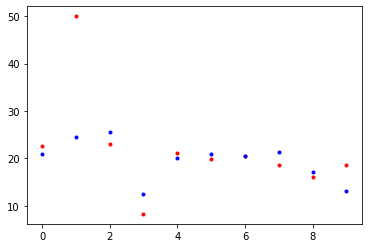

In [25]:
plt.plot(Y_test[0:10],"o",c="red",markersize=3)
plt.plot(Y_prediction[0:10],"o",c="blue",markersize=3)